In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
np.random.seed(12)

races =   ["asian", "black", "hispanic", "other", "white"]

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [10]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [11]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, mu=32, size=1000)
voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [13]:
len(voter_age)

1000

In [16]:
pd.crosstab(index=voter_frame.race, columns=voter_frame.age, margins=True)

age,29,32,35,36,37,38,39,40,41,42,...,60,61,62,63,64,65,67,69,72,All
race,,,,,,,,,,,,,,,,,,,,,
asian,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,44
black,0,0,1,0,1,3,1,8,8,10,...,0,0,1,1,1,0,1,0,0,147
hispanic,0,2,0,2,0,5,4,11,8,5,...,2,2,1,2,0,0,1,0,1,244
other,1,0,0,0,1,0,2,0,2,3,...,0,0,0,0,0,0,0,0,0,50
white,0,0,0,2,1,4,5,4,10,13,...,4,8,1,4,1,2,0,1,0,515
All,1,2,1,4,3,12,13,24,29,31,...,6,10,3,7,2,2,2,1,1,1000


In [17]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [18]:
# Post-hoc test

In [21]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], voter_age[groups[race2]])) 

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


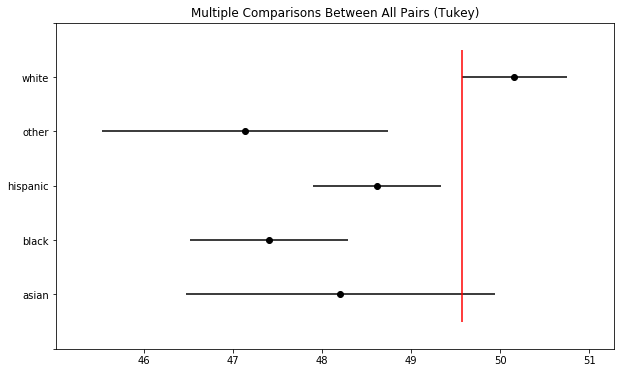

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [23]:
voter_age.mean()

49.141